In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [24]:
# models
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

In [3]:
data = pd.read_excel("/content/City Power Consumption.xlsx",index_col='S no')
data.head(5)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in Zone A
S no,,,,,,,,
1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


# Checking nature of data


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52583 entries, 1 to 52583
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature                   52263 non-null  object 
 1   Humidity                      52558 non-null  object 
 2   Wind Speed                    52512 non-null  float64
 3   general diffuse flows         52275 non-null  float64
 4   diffuse flows                 52568 non-null  float64
 5   Air Quality Index (PM)        52565 non-null  float64
 6   Cloudiness                    52583 non-null  int64  
 7    Power Consumption in Zone A  52583 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.6+ MB


In [74]:
data.describe()

,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in Zone A
count,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


# Checking missing values

In [75]:
data.isna().sum()

,0
Temperature,320
Humidity,25
Wind Speed,71
general diffuse flows,308
diffuse flows,15
Air Quality Index (PM),18
Cloudiness,0
Power Consumption in Zone A,0


In [76]:
data.isnull().mean()*100

,0
Temperature,0.608562
Humidity,0.047544
Wind Speed,0.135025
general diffuse flows,0.585741
diffuse flows,0.028526
Air Quality Index (PM),0.034232
Cloudiness,0.000000
Power Consumption in Zone A,0.000000


In [77]:
data.duplicated().sum()

np.int64(0)

In [78]:
for i in data.columns:
  print(' ********* ',i,'***********','\n')
  print(set(data[i].tolist()),'\n')

 *********  Temperature *********** 

{3.939, 4.212, 4.599, 4.968, 5.75, 4.25, 6, 6.756, 5.119, 7.5, 8.75, 14.93, 15.45, 15.57, 17.82, 16.13, 17.05, 18.06, 19.02, 13.11, 17.7, 17.45, 16.5, 17.25, 18.22, 19.44, 20, 21.27, 6.25, 23.04, 24.12, 25.16, 26.01, 7.25, 7, 7.75, 30.07, 31.18, 8.5, 8, 8.25, 35.46, 36.21, 9, 9.75, 9.25, 9.5, 10.5, 10, 10.25, 10.75, 11.75, 11.5, 11, 11.25, 12.75, 12, 12.5, 12.25, 13.5, 13.75, 13, 13.25, 14, 14.5, 14.75, 14.25, 15.75, 15.25, 15, 15.5, 16.75, 16.25, 16, 17.75, 17, 17.5, 18.5, 18.75, 18, 18.25, 6.845, 19, 19.5, 19.75, 19.25, 7.47, 20.25, 20.75, 20.5, 6.47, 21.75, 21, 21.25, 21.5, 22.5, 22, 22.25, 22.75, 23.5, 23, 23.25, 23.75, 24.25, 24, 24.5, 24.75, 25.5, 25, 25.25, 25.75, 26.5, 26, 26.75, 26.25, 5.625, 27.25, 27, 27.75, 27.5, 5.375, 28, 28.25, 28.5, 28.75, 29.25, 29.5, 29, 29.75, 30, 30.75, 30.5, 30.25, 5.964, 31.75, 31, 31.5, 31.25, 5.589, 6.714, 32.75, 32, 32.5, 32.25, 33.5, 33, 8.44, 8.69, 8.19, 8.94, 34.25, 9.44, 9.19, 9.69, 9.94, 35.25, 10.94, 

In [4]:
# Temperature colm - fixing typos
data['Temperature'] = np.where(data['Temperature']=='5.488 dc',5.488,data['Temperature'])
data['Temperature'] = np.where(data['Temperature']=='13.65 CD',13.65,data['Temperature'])
data['Temperature'] = np.where(data['Temperature']=='12.31 dc',12.31,data['Temperature'])

# Temperature colm - fixing typos
data['Humidity'] = np.where(data['Humidity']=='84.8 i',84.8,data['Humidity'])


# imputing nan values
#df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])


# converting to numeric dtype
data['Temperature'] = data['Temperature'].astype(float)
data['Humidity'] = data['Humidity'].astype(float)

In [5]:
data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Air Quality Index (PM)', 'Cloudiness',
       ' Power Consumption in Zone A'],
      dtype='object')

In [6]:
data = data.rename(columns = {' Power Consumption in Zone A':'Power Consumption in Zone A'})

**Univariate analysis**

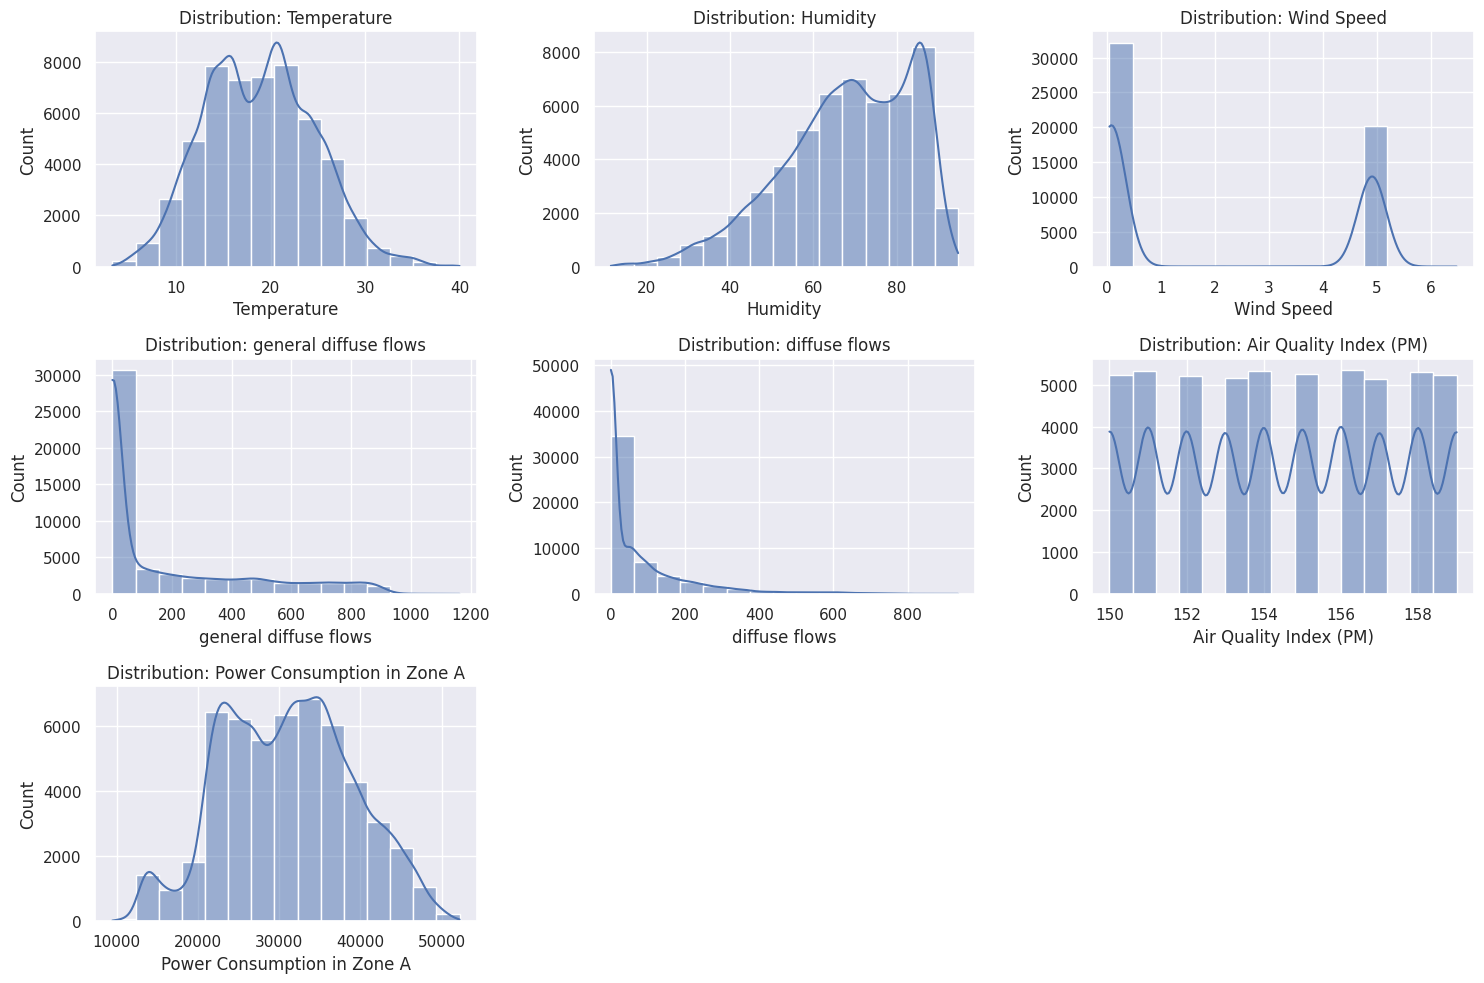

In [82]:
# Plot all numeric feature distributions
numeric_cols = data.drop(columns=["Cloudiness"]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=15)
    plt.title(f'Distribution: {col}')
plt.tight_layout()
plt.show()


**Multivariate Analysis - Correlation matrix**

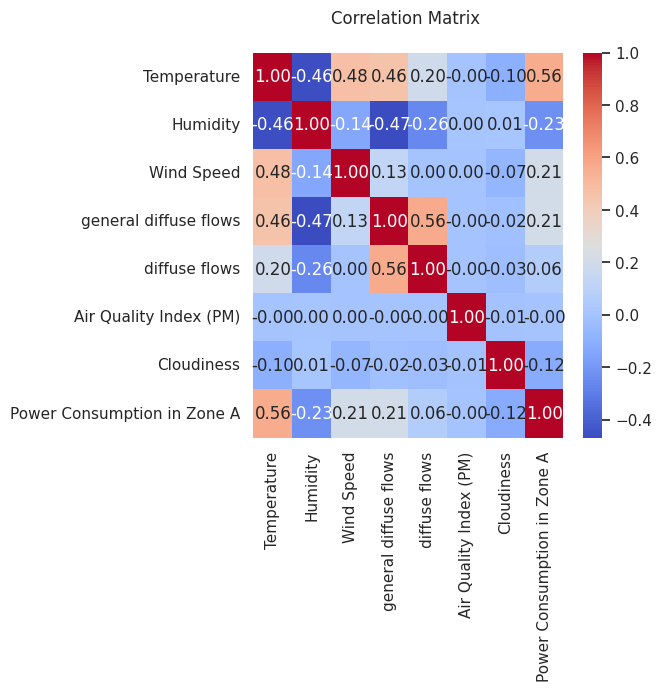

In [83]:
plt.figure(figsize=(5,5))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix \n")
plt.show()


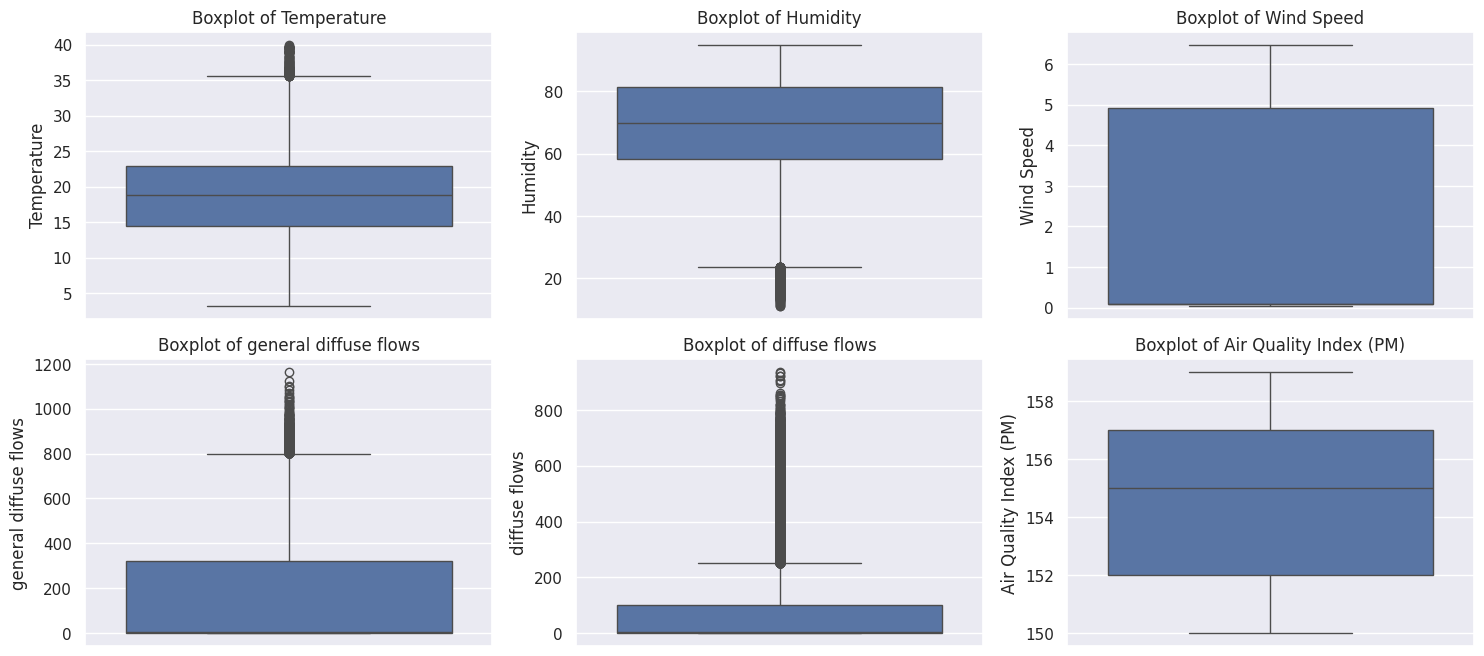

In [84]:
# Select numerical columns except target
numeric_cols_wo_target = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','diffuse flows', 'Air Quality Index (PM)']]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_wo_target, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Handling missing values

In [7]:
from sklearn.impute import SimpleImputer


features_to_impute = data.drop(columns=['Cloudiness', 'Power Consumption in Zone A'])


imputer = SimpleImputer(strategy='median')


imputed_data = imputer.fit_transform(features_to_impute)

# Convert back to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=features_to_impute.columns)

# Replace original columns with imputed ones
data.update(imputed_df)


In [8]:
data.head(5)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in Zone A
S no,,,,,,,,
1,6.414,74.5,0.083,0.070,0.085,159.0,1,34055.69620
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29814.68354
3,6.121,75.0,0.083,0.091,0.096,151.0,1,29128.10127
4,5.921,75.7,0.081,0.048,0.085,154.0,1,28228.86076
5,5.853,76.9,0.081,0.059,0.108,158.0,1,27335.69620


In [9]:
data['Temperature'] = np.where(data['Temperature'].isnull(),data['Temperature'].median(),data['Temperature'])

In [10]:
data.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
general diffuse flows,0
diffuse flows,0
Air Quality Index (PM),0
Cloudiness,0
Power Consumption in Zone A,0


# Categorizing AQI column

In [11]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

data['AQI_Category'] = data['Air Quality Index (PM)'].apply(categorize_aqi)


In [10]:
data.head(5)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in Zone A,AQI_Category
S no,,,,,,,,,
1,6.414,74.5,0.083,0.070,0.085,159.0,1,34055.69620,Unhealthy
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29814.68354,Unhealthy
3,6.121,75.0,0.083,0.091,0.096,151.0,1,29128.10127,Unhealthy
4,5.921,75.7,0.081,0.048,0.085,154.0,1,28228.86076,Unhealthy
5,5.853,76.9,0.081,0.059,0.108,158.0,1,27335.69620,Unhealthy


**Encoding AQI Category column**

In [12]:
# ordinal encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['AQI_Category_Encoded'] = le.fit_transform(data['AQI_Category']).astype(int)



In [13]:
data = data.drop(['AQI_Category'],axis=1)
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in Zone A,AQI_Category_Encoded
S no,,,,,,,,,
1,6.414,74.5,0.083,0.070,0.085,159.0,1,34055.69620,0
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29814.68354,0
3,6.121,75.0,0.083,0.091,0.096,151.0,1,29128.10127,0
4,5.921,75.7,0.081,0.048,0.085,154.0,1,28228.86076,0
5,5.853,76.9,0.081,0.059,0.108,158.0,1,27335.69620,0


**Feature Transformation**

In [14]:
import numpy as np

data['general diffuse flows'] = np.log1p(data['general diffuse flows'])
data['diffuse flows'] = np.log1p(data['diffuse flows'])
data['Wind Speed'] = np.sqrt(data['Wind Speed'])


# VIF (Variance Inflation Factor) – Detecting Multicollinearity

In [14]:
# general diffuse flows and diffuse flows columns are highly correlated

from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = variance_inflation_factor

X_vif = data[['Temperature', 'Humidity', 'general diffuse flows', 'diffuse flows', 'Wind Speed']]

vif_data=pd.DataFrame(columns=['feature','vif'])  #creating a df to see vif of each IV
vif_data['feature']=X_vif.columns
vif_data

vif_data['vif']= [VIF(X_vif,i) for i in range(5)]
vif_data


,feature,vif
0,Temperature,11.279400
1,Humidity,6.131518
2,general diffuse flows,31.785807
3,diffuse flows,30.339546
4,Wind Speed,2.894833


In [95]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in Zone A,AQI_Category_Encoded
S no,,,,,,,,,
1,6.414,74.5,0.288097,0.067659,0.081580,159.0,1,34055.69620,0
2,6.313,74.5,0.282843,0.060154,0.095310,151.0,1,29814.68354,0
3,6.121,75.0,0.288097,0.087095,0.091667,151.0,1,29128.10127,0
4,5.921,75.7,0.284605,0.046884,0.081580,154.0,1,28228.86076,0
5,5.853,76.9,0.284605,0.057325,0.102557,158.0,1,27335.69620,0


# Hold-out validation

In [15]:
# train test solit

from sklearn.model_selection import train_test_split

x = data.drop('Power Consumption in Zone A', axis=1)
y = data['Power Consumption in Zone A']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=5)

# Feature Scaling

In [16]:
# handling outliers

from sklearn.preprocessing import RobustScaler

# Columns to scale
features_to_scale = ['Temperature', 'Humidity', 'general diffuse flows',
                     'diffuse flows', 'Wind Speed']


r_scaler = RobustScaler()

# copying train_test data for scaling
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[features_to_scale] = r_scaler.fit_transform(x_train[features_to_scale])
x_test_scaled[features_to_scale] = r_scaler.transform(x_test[features_to_scale])


# Model building

**Linear regression model**

In [17]:
# model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model=LinearRegression()

lr_model.fit(x_train_scaled, y_train)

# model evaluation
y_pred = lr_model.predict(x_test_scaled)

# Calculate evaluation metrics
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"MAE:  {lr_mae:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R²:   {lr_r2:.4f}")

Linear Regression Results:
MAE:  5351.49
RMSE: 6599.17
R²:   0.3233


**Random Forest Model**

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scaled, y_train)


rf_y_pred = rf_model.predict(x_test_scaled)

# Calculate evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest Results:")
print(f"MAE:  {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R²:   {rf_r2:.4f}")

Random Forest Results:
MAE:  3460.89
RMSE: 4934.68
R²:   0.6216


**XGBoost Model**

In [19]:
from xgboost import XGBRegressor


xgb_model = XGBRegressor(random_state=42, verbosity=0)

xgb_model.fit(x_train_scaled, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(x_test_scaled)

# Calculate metrics
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("XGBoost Results:")
print(f"MAE:  {xgb_mae:.2f}")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R²:   {xgb_r2:.4f}")

XGBoost Results:
MAE:  3968.85
RMSE: 5355.30
R²:   0.5544


In [20]:
from sklearn.ensemble import VotingRegressor

# Voting Regressor
voting_reg = VotingRegressor(estimators=[('lr', lr_model),('rf',rf_model),('xgb', xgb_model)])

# Fit and evaluate
voting_reg.fit(x_train_scaled, y_train)
voting_reg_y_pred = voting_reg.predict(x_test_scaled)

mae = mean_absolute_error(y_test, voting_reg_y_pred)
rmse = np.sqrt(mean_squared_error(y_test, voting_reg_y_pred))
r2 = r2_score(y_test, voting_reg_y_pred)

print("Voting Regressor Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")


Voting Regressor Performance:
MAE: 4081.46
RMSE: 5324.16
R²: 0.5595


In [21]:
models = {'Linear Regression': lr_model,'Random Forest': rf_model,'XGBoost': xgb_model}

# Train and evaluate each model - looping
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"\nModel: {name}")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")


Model: Linear Regression
MAE:  5351.49
RMSE: 6599.17
R²:   0.3233

Model: Random Forest
MAE:  3460.89
RMSE: 4934.68
R²:   0.6216

Model: XGBoost
MAE:  3968.85
RMSE: 5355.30
R²:   0.5544


        Method Used       R_2
0  LinearRegression  0.323327
1           RForest  0.621629
2               XGB  0.554376
3            Voting  0.554376
Axes(0.125,0.11;0.775x0.77)


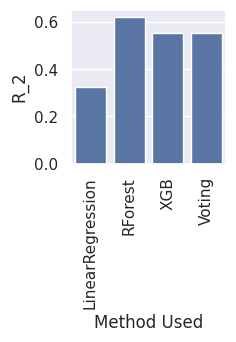

In [102]:
list1 = ['LinearRegression','RForest','XGB','Voting']
list2 = [lr_r2,rf_r2,xgb_r2,r2]

df_accuracy = pd.DataFrame({"Method Used":list1, "R_2":list2})

print(df_accuracy)

plt.figure(figsize=(2,2))
chart = sns.barplot(x="Method Used", y="R_2", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)


**# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off**

In [103]:
train_pred = rf_model.predict(x_train_scaled)
test_pred = rf_model.predict(x_test_scaled)

r2_train = r2_score(y_train, train_pred)
r2_test = r2_score(y_test, test_pred)

print("************************")
print("Training r2 :",r2_train )
print("************************")
print("Testing r2 :",r2_test)

if abs(r2_train - r2_test) > 0.15:
    if r2_train > r2_test:
        print("\n⚠️ Likely Overfitting: Model performs much better on training data.")
    else:
        print("\n⚠️ Unusual: Test set performs better than training. Check data split or leakage.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\n⚠️ Likely Underfitting: Model is not capturing the pattern well.")
else:
    print("\n✅ Model is reasonably generalizing (good fit).")

************************
Training r2 : 0.9457916145687648
************************
Testing r2 : 0.6216285309587752

⚠️ Likely Overfitting: Model performs much better on training data.


**Cross Validation**

In [104]:
from sklearn.model_selection import cross_val_score,KFold

training = cross_val_score(rf_model, x_train_scaled, y_train, cv=10)
print("Training Accuracy :", training.mean()) # mean of test scores
print("***************")
print("Testing Accuracy :",r2_test)

Training Accuracy : 0.6072905265474047
***************
Testing Accuracy : 0.6216285309587752


# Cross-Validation

In [105]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# Define custom scorers
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)  # negative for compatibility
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Set up cross-validation config (5-fold is common)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Replace 'model' with your trained model (e.g., best_rf or rf_model)
model = rf_model

# Cross-validate for R², RMSE, MAE
r2_scores = cross_val_score(model, x_train_scaled, y_train, cv=cv, scoring='r2')
rmse_scores = cross_val_score(model, x_train_scaled, y_train, cv=cv, scoring=rmse_scorer)
mae_scores = cross_val_score(model, x_train_scaled, y_train, cv=cv, scoring=mae_scorer)

# Display results
print("\nCross-Validation Results (5-Fold):")
print(f"Avg R²:    {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"Avg RMSE:  {-np.mean(rmse_scores):.2f} ± {np.std(rmse_scores):.2f}")
print(f"Avg MAE:   {-np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")



Cross-Validation Results (5-Fold):
Avg R²:    0.5978 ± 0.0113
Avg RMSE:  5085.46 ± 82.13
Avg MAE:   3610.73 ± 53.68


In [22]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'auto','log2']
}

# 10-Fold CV
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator = rf_model,
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1,   # Use all cores
    verbose=2
)

# Fit on training data
gs=grid_search.fit(x_train_scaled, y_train)

# Best model
best_rf = gs.best_estimator_

print("Best Parameters:", gs.best_params_)
print("Best R² Score (CV):", gs.best_score_)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


KeyboardInterrupt: 

In [23]:
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_dist={'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]}

cv_rf=GridSearchCV(rf_model,cv=10,param_grid=param_dist)

cv_rf.fit(x_train_scaled,y_train)

cv_rf.best_params_

y_pred=cv_rf.predict(x_test_scaled)
accuracy_rf =r2_score(y_test,y_pred)
print(f"testing R_2 SCORE :",accuracy_rf)

y_pred_train=cv_rf.predict(x_train_scaled)
accuracy_rf_train = r2_score(y_train,y_pred_train)
print(f"training R_2 SCORE :",accuracy_rf_train)


KeyboardInterrupt: 

# Code to Visualize Cross-Validation Results

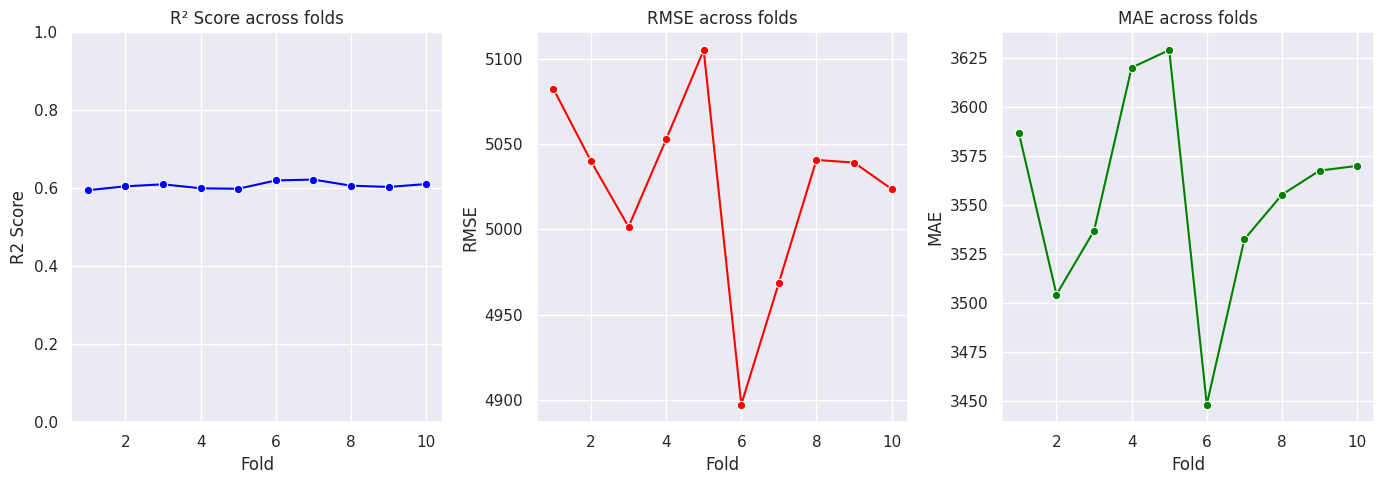

In [107]:
# Assume these are from 10-fold cross-validation
r2_scores = cross_val_score(rf_model, x_train_scaled, y_train, cv=10, scoring='r2')
rmse_scores = cross_val_score(rf_model, x_train_scaled, y_train, cv=10, scoring=rmse_scorer)
mae_scores = cross_val_score(rf_model, x_train_scaled, y_train, cv=10, scoring=mae_scorer)

# Convert negative RMSE/MAE to positive for plotting
rmse_scores = -rmse_scores
mae_scores = -mae_scores

# Create DataFrame for plotting
cv_results_df = pd.DataFrame({
    'Fold': list(range(1, 11)),
    'R2 Score': r2_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores
})

# Plot
plt.figure(figsize=(14, 5))

# R2 Score Plot
plt.subplot(1, 3, 1)
sns.lineplot(data=cv_results_df, x='Fold', y='R2 Score', marker='o', color='blue')
plt.title('R² Score across folds')
plt.ylim(0, 1)

# RMSE Plot
plt.subplot(1, 3, 2)
sns.lineplot(data=cv_results_df, x='Fold', y='RMSE', marker='o', color='red')
plt.title('RMSE across folds')

# MAE Plot
plt.subplot(1, 3, 3)
sns.lineplot(data=cv_results_df, x='Fold', y='MAE', marker='o', color='green')
plt.title('MAE across folds')

plt.tight_layout()
plt.show()


**Cross-Validation Comparison of Multiple Regression Models**

Running CV for: LinearRegression
Running CV for: RandomForest
Running CV for: XGBoost
Running CV for: GradientBoosting
Running CV for: ExtraTrees

Cross-Validation Results:
              Model   R2 Mean    R2 Std    RMSE Mean    RMSE Std     MAE Mean  \
0  LinearRegression  0.323441  0.009781  6594.700514   76.171157  5351.646992   
1      RandomForest  0.605732  0.015105  5033.382005  101.548750  3557.823729   
2           XGBoost  0.538173  0.014596  5447.871262   90.613788  4052.577840   
3  GradientBoosting  0.426047  0.011395  6073.910254   79.175609  4793.847326   
4        ExtraTrees  0.615020  0.014552  4973.581245   88.676150  3492.094722   

     MAE Std  
0  60.177717  
1  63.824117  
2  79.825088  
3  59.903926  
4  55.402644  


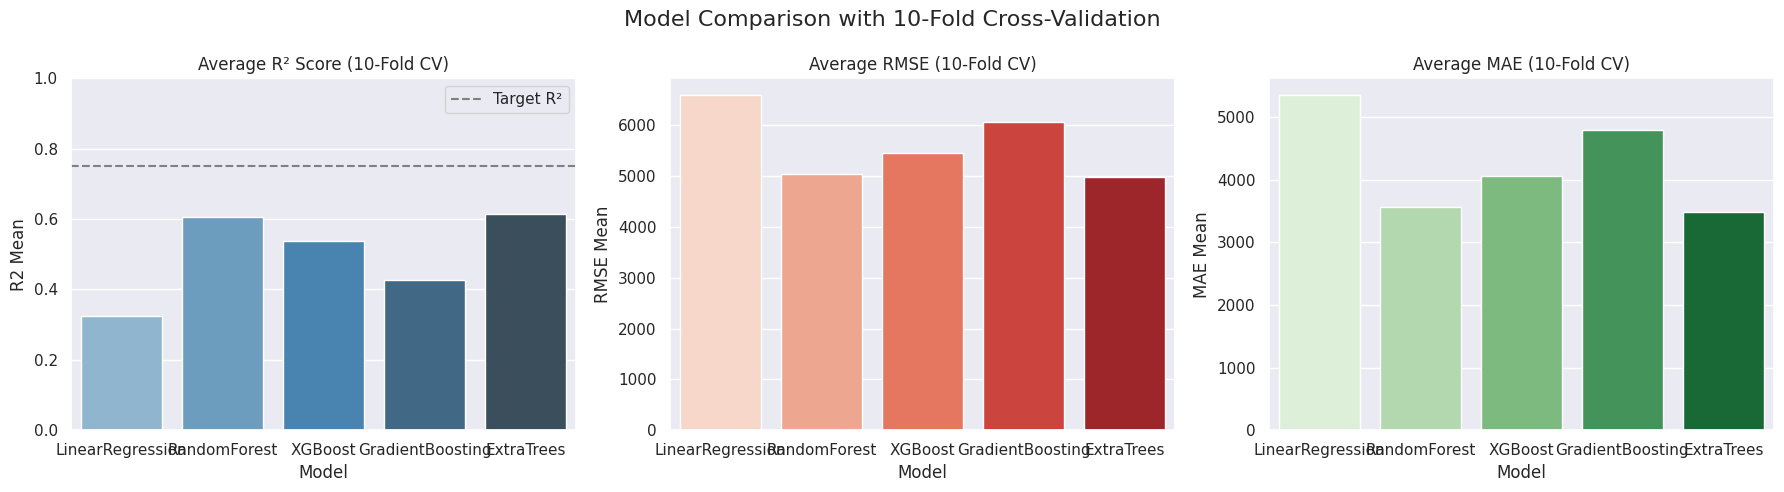

In [110]:
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor


# Define custom scorers
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# 10-Fold Cross-Validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Define models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'ExtraTrees': ExtraTreesRegressor(random_state=42)
}

# Store results
cv_results = []

# Run cross-validation for each model
for name, model in models.items():
    print(f"Running CV for: {name}")

    r2 = cross_val_score(model, x_train_scaled, y_train, scoring='r2', cv=cv)
    rmse_ = cross_val_score(model, x_train_scaled, y_train, scoring=rmse_scorer, cv=cv)
    mae = cross_val_score(model, x_train_scaled, y_train, scoring=mae_scorer, cv=cv)

    cv_results.append({
        'Model': name,
        'R2 Mean': np.mean(r2),
        'R2 Std': np.std(r2),
        'RMSE Mean': -np.mean(rmse_),
        'RMSE Std': np.std(rmse_),
        'MAE Mean': -np.mean(mae),
        'MAE Std': np.std(mae)
    })

# Convert to DataFrame
cv_df = pd.DataFrame(cv_results)
print("\nCross-Validation Results:")
print(cv_df)

# ------------------------------
# 📊 Visualization
# ------------------------------
plt.figure(figsize=(18, 5))

# R² Score Plot
plt.subplot(1, 3, 1)
sns.barplot(data=cv_df, x='Model', y='R2 Mean', palette='Blues_d')
plt.title('Average R² Score (10-Fold CV)')
plt.ylim(0, 1)
plt.axhline(0.75, color='gray', linestyle='--', label='Target R²')
plt.legend()

# RMSE Plot
plt.subplot(1, 3, 2)
sns.barplot(data=cv_df, x='Model', y='RMSE Mean', palette='Reds')
plt.title('Average RMSE (10-Fold CV)')

# MAE Plot
plt.subplot(1, 3, 3)
sns.barplot(data=cv_df, x='Model', y='MAE Mean', palette='Greens')
plt.title('Average MAE (10-Fold CV)')

plt.suptitle('Model Comparison with 10-Fold Cross-Validation', fontsize=16)
plt.tight_layout()
plt.show()


# choosing ExtraTrees model

In [19]:
from sklearn.ensemble import ExtraTreesRegressor

best_model = ExtraTreesRegressor(random_state=42)
best_model.fit(x_train_scaled, y_train)

y_pred = best_model.predict(x_test_scaled)

print("Final Model Evaluation on Test Set:")
print(f"R²:   {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred):.2f}")


Final Model Evaluation on Test Set:
R²:   0.6293
RMSE: 4884.35
MAE:  3402.20


In [112]:
# checking for over/underfit

train_pred = best_model.predict(x_train_scaled)
test_pred = best_model.predict(x_test_scaled)

best_model_train = r2_score(y_train, train_pred)
best_model_test = r2_score(y_test, test_pred)

print("************************")
print("Training r2 :",r2_train )
print("************************")
print("Testing r2 :",r2_test)

************************
Training r2 : 0.9457916145687648
************************
Testing r2 : 0.6216285309587752


In [113]:
training = cross_val_score(best_model, x_train_scaled, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testing Accuracy :",r2_test)

Training Accuracy : 0.6183020019447181
***************
Testing Accuracy : 0.6216285309587752


**Try - Remove Less Important Features**



In [27]:
importances = best_model.feature_importances_
features = x_train_scaled.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Show all features ranked
print(importance_df)

# Drop features with very low importance (< 0.01 as threshold)
low_importance_features = importance_df[importance_df['Importance'] < 0.01]['Feature'].tolist()
print("Dropping low importance features:", low_importance_features)

# Drop from training and test data
x_train_reduced = x_train_scaled.drop(columns=low_importance_features)
x_test_reduced = x_test_scaled.drop(columns=low_importance_features)


                  Feature  Importance
0             Temperature    0.414689
1                Humidity    0.162018
2              Wind Speed    0.148068
3   general diffuse flows    0.107884
4           diffuse flows    0.097076
5  Air Quality Index (PM)    0.051092
7    AQI_Category_Encoded    0.011611
6              Cloudiness    0.007563
Dropping low importance features: ['Cloudiness']


In [29]:
#rebuilding model - w/o cloudiness column

best_model = ExtraTreesRegressor(random_state=42)
best_model.fit(x_train_reduced, y_train)

y_pred = best_model.predict(x_test_reduced)

print("Final Model Evaluation on Test Set:")
print(f"R²:   {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred):.2f}")

Final Model Evaluation on Test Set:
R²:   0.6196
RMSE: 4948.01
MAE:  3456.82


In [31]:
# checking for over/underfit

train_pred = best_model.predict(x_train_reduced)
test_pred = best_model.predict(x_test_reduced)

best_model_train = r2_score(y_train, train_pred)
best_model_test = r2_score(y_test, test_pred)

print("************************")
print("Training r2 :",best_model_train )
print("************************")
print("Testing r2 :",best_model_test)

************************
Training r2 : 0.9997140113276082
************************
Testing r2 : 0.6195819073291157


In [33]:
#checking with cross validation score

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer


training = cross_val_score(best_model, x_train_reduced, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testing Accuracy :",best_model_test)

Training Accuracy : 0.6095096261666111
***************
Testing Accuracy : 0.6195819073291157


**Feature enginnering - Temperature + Humidity **

In [20]:
# Create new features
x_train_fe = x_train_scaled.copy()
x_test_fe = x_test_scaled.copy()

# Add Temperature + Humidity
x_train_fe['Temp_Humidity_Interaction'] = x_train_fe['Temperature'] * x_train_fe['Humidity']
x_test_fe['Temp_Humidity_Interaction'] = x_test_fe['Temperature'] * x_test_fe['Humidity']

# Temperature squared
x_train_fe['Temperature_Sq'] = x_train_fe['Temperature'] ** 2
x_test_fe['Temperature_Sq'] = x_test_fe['Temperature'] ** 2


In [21]:
# Train ExtraTrees model
model = ExtraTreesRegressor(random_state=42)
model.fit(x_train_fe, y_train)

train_preds = model.predict(x_train_fe)
test_preds = model.predict(x_test_fe)


# checking for over/underfit
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, test_preds))
mae = mean_absolute_error(y_test, test_preds)

In [22]:
print("\n✅ Model Evaluation After Feature Engineering:")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")
print(f"RMSE:     {rmse:.2f}")
print(f"MAE:      {mae:.2f}")
print(f"Overfit Gap: {abs(train_r2 - test_r2):.4f}")


✅ Model Evaluation After Feature Engineering:
Train R²: 0.9998
Test R²:  0.6417
RMSE:     4801.82
MAE:      3306.18
Overfit Gap: 0.3580


In [23]:
#checking with cross validation score

training = cross_val_score(model, x_train_fe, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testing Accuracy :",test_r2)

Training Accuracy : 0.627831129767506
***************
Testing Accuracy : 0.6417292462324868


# Stacking Regressor

In [38]:
# Define base models and meta-model

base_models = [
    ('et', ExtraTreesRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42, verbosity=0))
]

meta_model = LinearRegression()

# Build Stacking Regressor
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=10,
    n_jobs=-1
)

stack_model.fit(x_train_fe, y_train)

StackingRegressor(cv=10,
                  estimators=[('et', ExtraTreesRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [27]:
train_preds = stack_model.predict(x_train_fe)
test_preds = stack_model.predict(x_test_fe)

# checking for over/underfit
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, test_preds))
mae = mean_absolute_error(y_test, test_preds)

print("✅ Stacking Regressor Evaluation:")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")
print(f"RMSE:     {rmse:.2f}")
print(f"MAE:      {mae:.2f}")
print(f"Overfit Gap: {abs(train_r2 - test_r2):.4f}")

✅ Stacking Regressor Evaluation:
Train R²: 0.9977
Test R²:  0.6431
RMSE:     4792.61
MAE:      3291.09
Overfit Gap: 0.3546


In [32]:
#checking with cross validation score

training = cross_val_score(stack_model, x_train_fe, y_train, cv=10)
print("Training Accuracy :", training.mean())
print("***************")
print("Testing Accuracy :",test_r2)

KeyboardInterrupt: 

In [31]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(stack_model, x_train_fe, y_train, scoring='r2', cv=cv)

print("\n🔍 Cross-Validation R² Scores (Stacked Model):")
print(f"Mean CV R²: {cv_scores.mean():.4f}")
print(f"Std CV R²:  {cv_scores.std():.4f}")

KeyboardInterrupt: 

In [34]:
# optimized for cross validation


# Build Stacking Regressor
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=3,
    n_jobs=-1
)

# stack_model.fit(x_train_fe, y_train)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stack_model, x_train_fe, y_train, cv=cv, scoring='r2', n_jobs=-1)

In [36]:
print("\n🔍 Cross-Validation R² Scores (Stacked Model):")
print("Training Accuracy :", training.mean())


🔍 Cross-Validation R² Scores (Stacked Model):
Training Accuracy : 0.627831129767506


**SHAP for Feature Stability Check**

In [39]:
import shap
explainer = shap.Explainer(stack_model.predict, x_test_fe)
shap_values = explainer(x_test_fe)
shap.plots.beeswarm(shap_values)


ExactExplainer explainer:   4%|▍         | 649/15775 [14:53<5:50:45,  1.39s/it]


KeyboardInterrupt: 

In [40]:
import joblib
joblib.dump(stack_model, 'power_consumption_model.pkl')

['power_consumption_model.pkl']

In [46]:
!pip install streamlit
import streamlit as st
# import numpy as np
# import joblib

# Load model
model = joblib.load("power_consumption_model.pkl")

# App title and description
st.title("⚡ Power Consumption Predictor")
st.markdown("""
This app predicts **power consumption in Zone A** (Wellington, NZ) based on environmental and meteorological inputs.
""")

# Sidebar for user input
st.sidebar.header("Input Environmental Data")

def get_user_input():
    temperature = st.sidebar.slider("Temperature (°C)", 0.0, 35.0, 15.0)
    humidity = st.sidebar.slider("Humidity (%)", 0.0, 100.0, 75.0)
    wind_speed = st.sidebar.slider("Wind Speed (m/s)", 0.0, 5.0, 0.5)
    general_diffuse = st.sidebar.slider("General Diffuse Radiation", 0.0, 0.2, 0.05)
    diffuse = st.sidebar.slider("Diffuse Radiation", 0.0, 0.2, 0.1)
    aqi = st.sidebar.slider("Air Quality Index (PM)", 0, 200, 150)
    cloudiness = st.sidebar.radio("Cloudiness", [0, 1])

    return {
        "Temperature": temperature,
        "Humidity": humidity,
        "Wind Speed": wind_speed,
        "general diffuse flows": general_diffuse,
        "diffuse flows": diffuse,
        "Air Quality Index (PM)": aqi,
        "Cloudiness": cloudiness
    }

# Get user input
input_data = get_user_input()

# Preprocess input
def preprocess_input(data):
    temp = data['Temperature']
    humidity = data['Humidity']
    wind = data['Wind Speed']
    gdif = data['general diffuse flows']
    dif = data['diffuse flows']
    aqi = data['Air Quality Index (PM)']
    cloud = data['Cloudiness']

    # Feature transformations (same as training)
    temp_hum = temp * humidity
    temp_sq = temp ** 2
    log_diffuse = np.log1p(dif)
    sqrt_wind = np.sqrt(wind)

    # Final feature array (must match training order)
    features = np.array([[
        temp, humidity, wind, gdif, dif, aqi, cloud,
        temp_hum, temp_sq, log_diffuse, sqrt_wind
    ]])

    return features

# Predict
processed_input = preprocess_input(input_data)

if st.button("Predict Power Consumption"):
    prediction = model.predict(processed_input)
    st.success(f"🔋 Estimated Power Consumption: **{prediction[0]:,.2f} kWh**")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


2025-07-10 09:58:34.475 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 09:58:34.697 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-10 09:58:34.698 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 09:58:34.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 09:58:34.702 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 09:58:34.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 09:58:34.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-10 09:58:34.707 Thread 'MainThread': mi